In [1]:
import numpy as np
import copy

In [2]:
def JacobiMethod(a,x,B,N,E):
    A = copy.copy(a)
    X = copy.copy(x)
    b = copy.copy(B)
    n = copy.copy(N)
    e = copy.copy(E)

    print("\n***** Jacobi Method *****")
    condition = True
    count = 0
    
    accuracy = []

    while condition:

        X_new = np.zeros((n))
        for i in range(n):
            tmp = 0
            for j in range(n):
                if(i!=j):
                    tmp += A[i][j]*X[j]
            X_new[i] = (b[i] - tmp)/A[i][i]
        
        print(f'\niteration = {count}',end="\t")

        for i in range(n):
            print(f'   X{i+1} = {X_new[i]:.20f}', end = "\t")
        print()
        
        accuracyReached = abs(X_new[i] - X[i])
        for i in range(1,n):
            accuracyReached = max(accuracyReached,abs(X_new[i] - X[i])) 
        
        a = []
        a.append((count+1))
        a.append(accuracyReached)

        accuracy.append(a)

        count += 1
        condition = False
        for i in range(n):
            X[i] = copy.copy(X_new[i])
        if accuracyReached>e:
            condition = True
        

    print(f'\nSolution: Iteration = {count}')
    for i in range(n):
        print(f'x{i+1} = {X[i]}', end = "\t")
    print()
    return accuracy

In [3]:
def GaussSiedelMethod(a,x,B,N,E):
    A = copy.copy(a)
    X = copy.copy(x)
    b = copy.copy(B)
    n = copy.copy(N)
    e = copy.copy(E)
    
    print("\n***** Gauss-Siedel Method *****")

    condition = True
    count = 0
    
    accuracy = []

    while condition:
        X_prev = copy.copy(X)
        X_new = np.zeros((n))
        for i in range(n):
            
            for j in range (i):
                X[j] = X_new[j]
            
            tmp = 0
            for j in range(n):
                if(i!=j):
                    tmp += A[i][j]*X[j]
            X_new[i] = (b[i] - tmp)/A[i][i]
            
        
        print(f'\niteration = {count}',end="\t")
        for i in range(n):
            print(f'  X{i+1} = {X_new[i]:.20f}', end = "\t")
        print()
        
        accuracyReached = abs(X_new[i] - X_prev[i])
        for i in range(1,n):
            accuracyReached = max(accuracyReached,abs(X_new[i] - X_prev[i])) 
        
        a = []
        a.append((count+1))
        a.append(accuracyReached)

        accuracy.append(a)
                
        count += 1
        condition = False
        for i in range(n):
            X[i] = copy.copy(X_new[i])
        if accuracyReached>e:
            condition = True

    print(f'\nSolution: Iteration = {count}')
    for i in range(n):
        print(f'x{i+1} = {X[i]}', end = "\t")
    print()
    return accuracy

In [4]:
def SOR(a,x,B,N,E,W = 1.0):
    
    A = copy.copy(a)
    X = copy.copy(x)
    b = copy.copy(B)
    n = copy.copy(N)
    e = copy.copy(E)
    w = copy.copy(W)

    accuracy = []
    print("\n***** Succesive Over Relaxation *****")

    condition = True
    count = 0

    while condition:
        X_prev = copy.copy(X)
        X_new = np.zeros((n))
        for i in range(n):
            for j in range (i):
                X[j] = X_new[j]
            
            tmp = 0
            n = len(A)
            for j in range(n):
                if(i!=j):
                    tmp += A[i][j]*X[j]
    
            X_new[i] = (1-w)*X_prev[i] + w*((b[i] - tmp)/A[i][i])
            
        
        print(f'\niteration = {count}',end="\t")
        for i in range(n):
            print(f'  X{i+1} = {X_new[i]:.20f}', end = "\t")
        print()
        accuracyReached = abs(X_new[i] - X_prev[i])
        for i in range(1,n):
            accuracyReached = max(accuracyReached,abs(X_new[i] - X_prev[i]))
        
             
        a = []
        a.append((count+1))
        a.append(accuracyReached)

        accuracy.append(a)
        
        count += 1
        condition = False
        for i in range(n):
            X[i] = copy.copy(X_new[i])
        if accuracyReached>e:
            condition = True

    print(f'\nSolution: Iteration = {count}')
    for i in range(n):
        print(f'x{i+1} = {X[i]}', end = "\t")
    print()
    return accuracy

In [5]:
n = 3
# A = np.array([[-10.,-8.,0.],
#             [-8.,10.,-1.,],
#             [0.,-1.,10.]
#             ])

# b = np.array([-6.,9.,28.])

A = np.array([[3.,-1.,1.],
            [-1.,3.,-1.],
            [1.,-1.,3]
            ])
b = np.array([
    [-1.],
    [7.],
    [-7.]
])
# initial Guesses
X = np.array([0.,0.,0.])

# Reading tolerable error
e = 0.0001


# Reading relaxation factor
w = 9/10

# Input Section

n = int(input("Enter Number of Variables: "))

A = np.zeros((n,n))
print("Enter Co-efficient Matrix:")
for i in range(n):
    for j in range(n):
        A[i][j] = float(input(">"))

b = np.zeros((n))
print("Enter RHS: ")
for i in range(n):
    b[i] = float(input(">"))

X = np.zeros((n))
print("Enter Initial Guasses:")
for i in range(n):
    b[i] = float(input(">"))
e = 

In [6]:
jacobi = JacobiMethod(A,X,b,n,e)
jacobi_count = []
jacobi_accuracy = []
for i in jacobi:
        jacobi_count.append(i[0])
        jacobi_accuracy.append(i[1])



***** Jacobi Method *****

iteration = 0	   X1 = -0.33333333333333331483	   X2 = 2.33333333333333348136	   X3 = -2.33333333333333348136	

iteration = 1	   X1 = 1.22222222222222232091	   X2 = 1.44444444444444441977	   X3 = -1.44444444444444441977	

iteration = 2	   X1 = 0.62962962962962965019	   X2 = 2.25925925925925907833	   X3 = -2.25925925925925907833	

iteration = 3	   X1 = 1.17283950617283938556	   X2 = 1.79012345679012341293	   X3 = -1.79012345679012341293	

iteration = 4	   X1 = 0.86008230452674894195	   X2 = 2.12757201646090532421	   X3 = -2.12757201646090532421	

iteration = 5	   X1 = 1.08504801097393688281	   X2 = 1.91083676268861446523	   X3 = -1.91083676268861446523	

iteration = 6	   X1 = 0.94055784179240964349	   X2 = 2.05807041609510754654	   X3 = -2.05807041609510754654	

iteration = 7	   X1 = 1.03871361073007162368	   X2 = 1.96082914189910084701	   X3 = -1.96082914189910084701	

iteration = 8	   X1 = 0.97388609459940056468	   X2 = 2.02596148961032351821	   X3 = -2.0259

In [7]:
gs = GaussSiedelMethod(A,X,b,n,e)

gs_count = []
gs_accuracy =[] 
for i in gs:
    gs_count.append(i[0])
    gs_accuracy.append(i[1])
    


***** Gauss-Siedel Method *****

iteration = 0	  X1 = -0.33333333333333331483	  X2 = 2.22222222222222232091	  X3 = -1.48148148148148162129	

iteration = 1	  X1 = 0.90123456790123468441	  X2 = 2.13991769547325105805	  X3 = -1.92043895747599435708	

iteration = 2	  X1 = 1.02011888431641506436	  X2 = 2.03322664228014016174	  X3 = -1.99563074734542489352	

iteration = 3	  X1 = 1.00961912987518842577	  X2 = 2.00466279417658777007	  X3 = -2.00165211189953362592	

iteration = 4	  X1 = 1.00210496869204046533	  X2 = 2.00015095226416894647	  X3 = -2.00065133880929080235	

iteration = 5	  X1 = 1.00026743035781984226	  X2 = 1.99987203051617634664	  X3 = -2.00013179994721435051	

iteration = 6	  X1 = 1.00000127682113038041	  X2 = 1.99995649229130534330	  X3 = -2.00001492817660819767	

iteration = 7	  X1 = 0.99999047348930447665	  X2 = 1.99999184843756538932	  X3 = -1.99999954168391291809	

Solution: Iteration = 8
x1 = 0.9999904734893045	x2 = 1.9999918484375654	x3 = -1.999999541683913	


In [8]:
w = 0.9

sor = SOR(A,X,b,n,e,w)
sor_count = []
sor_accuracy = []
for i in sor:
    sor_count.append(i[0])
    sor_accuracy.append(i[1])



***** Succesive Over Relaxation *****

iteration = 0	  X1 = -0.29999999999999998890	  X2 = 2.01000000000000023093	  X3 = -1.40700000000000002842	

iteration = 1	  X1 = 0.69510000000000005116	  X2 = 2.08742999999999989669	  X3 = -1.82300100000000009359	

iteration = 2	  X1 = 0.94263929999999995779	  X2 = 2.04463448999999997113	  X3 = -1.95170154299999976111	

iteration = 3	  X1 = 0.99316473989999987104	  X2 = 2.01690240807000042977	  X3 = -1.98804885384899976408	

iteration = 4	  X1 = 1.00080185256570008967	  X2 = 2.00551614042201009624	  X3 = -1.99739059902800697444	

iteration = 5	  X1 = 1.00095220709157506356	  X2 = 2.00162009646127136975	  X3 = -1.99953869309189191661	

iteration = 6	  X1 = 1.00044285757510653667	  X2 = 2.00043325899109136756	  X3 = -1.99995674888439345374	

iteration = 7	  X1 = 1.00016128812015603344	  X2 = 2.00010468766983828814	  X3 = -2.00001265502353442471	

iteration = 8	  X1 = 1.00005133162002746161	  X2 = 2.00002207174593138461	  X3 = -2.0000100434645822211

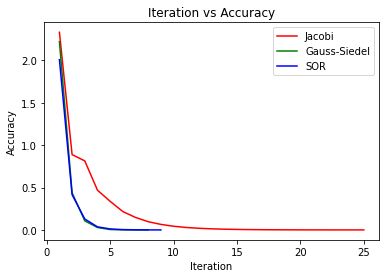

In [9]:
import matplotlib.pyplot as plt
plt.title("Iteration vs Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Iteration")
plt.plot(jacobi_count,jacobi_accuracy,color = 'red')
plt.plot(gs_count,gs_accuracy,color = 'green')
plt.plot(sor_count,sor_accuracy,color = 'blue')
plt.legend(["Jacobi", "Gauss-Siedel", "SOR"], loc="upper right")
plt.show()